In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('advertising.csv')

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.drop('Radio', axis=1,inplace=True)
df.drop('Newspaper', axis=1,inplace=True)

In [8]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [9]:
df.shape

(200, 2)

In [10]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [12]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [14]:
X=df['TV']
Y=df['Sales']

Text(0, 0.5, 'Sales')

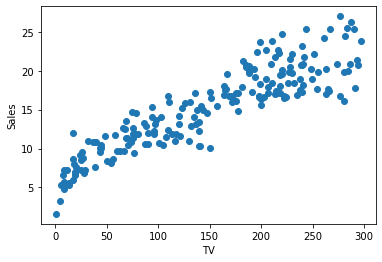

In [16]:
plt.scatter('TV','Sales',data=df)
plt.xlabel('TV')
plt.ylabel('Sales')


C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

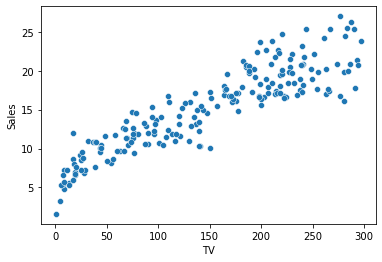

In [18]:
sns.scatterplot(X,Y)

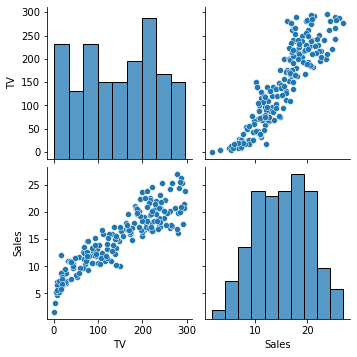

In [21]:
sns.pairplot(df)

In [57]:
print(X.shape)
print(Y.shape)

(200,)
(200,)


In [119]:
X=X.reshape(-1,1)
#Y=Y.reshape(-1,1)

In [120]:
X.shape

(200, 1)

In [122]:
Y=Y.values.reshape(-1,1)


In [123]:
Y.shape

(200, 1)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [126]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lm=LinearRegression()

In [129]:
lm.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred=lm.predict(X_test)

In [131]:
y_pred

array([[19.17655208],
       [ 9.43941271],
       [10.82881233],
       [20.50357049],
       [22.8230172 ],
       [15.3939825 ],
       [21.13305358],
       [18.63213427],
       [11.17474448],
       [ 9.93846237],
       [23.55457863],
       [19.19923615],
       [22.59617644],
       [18.63780529],
       [21.81357584],
       [12.24656704],
       [12.41669761],
       [ 7.38083287],
       [18.79092279],
       [15.49606084],
       [11.14071837],
       [14.81553858],
       [ 8.25416977],
       [19.60754951],
       [13.76640009],
       [20.20300649],
       [ 6.94416442],
       [13.738045  ],
       [10.78344418],
       [19.08014476],
       [20.99127811],
       [16.61892257],
       [11.06699512],
       [22.0404166 ],
       [18.85897502],
       [12.22955398],
       [12.99514153],
       [21.94400928],
       [18.53005593],
       [ 7.91957966],
       [15.7852828 ],
       [23.71336716],
       [20.52058354],
       [13.18228515],
       [13.55090138],
       [ 7

In [132]:
a=lm.coef_
b=lm.intercept_
print(a)
print(b)

[[0.05671019]]
[6.90446728]


In [133]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print(rmse)

2.725234081389714


In [134]:
from sklearn.metrics import r2_score

In [136]:
print('R2 score is:', r2_score(y_test,y_pred))

R2 score is: 0.7321883697919194


#Checking for underfitting and overfitting

In [138]:
print('Training set score: {:.4f}'.format(lm.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(lm.score(X_test,y_test)))

Training set score: 0.8450
Test set score: 0.7322


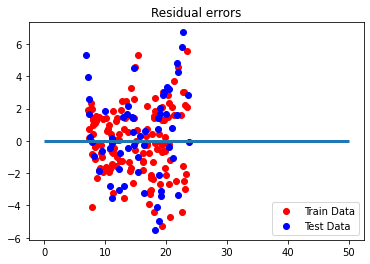

In [139]:
# Plotting residual errors

y_pred_train=lm.predict(X_train)
train_residual= y_pred_train - y_train
y_pred_test=lm.predict(X_test)
test_residual=y_pred_test -y_test

plt.scatter(y_pred_train, train_residual,color='red', label='Train Data')
plt.scatter(y_pred_test,test_residual,color='blue', label='Test Data')
plt.hlines(xmin=0, xmax=50, y=0, linewidth=3)
plt.title('Residual errors')
plt.legend(loc=4)
plt.show()
